Análise de dados de RH (Recursos Humanos)

In [1]:
from platform import python_version
print(python_version())

3.9.13


In [2]:
# pacote para identificar todos os pacotes utilizados no projeto
'''
!pip install -q -U watermark
'''

'\n!pip install -q -U watermark\n'

In [3]:
#instalando pacotes importantes para o projeto
'''
!pip install -q missingno
!pip install -q category_encoders 
!pip install -q plotly 
'''

'\n!pip install -q missingno\n!pip install -q category_encoders \n!pip install -q plotly \n'

In [4]:
#imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [5]:
%reload_ext watermark
%watermark --iversions

matplotlib       : 3.5.2
plotly           : 5.9.0
sys              : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
missingno        : 0.5.1
numpy            : 1.21.5
pandas           : 1.4.4
scipy            : 1.9.1
seaborn          : 0.11.2
category_encoders: 2.5.1.post0



In [6]:
# importando o dataset
df = pd.read_csv("projeto2_analise_de_dados_pyton/dataset/aug_train.csv")

In [7]:
df.shape

(19158, 14)

In [8]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Análise Exploratória de Dados

In [11]:
#descrevendo os dados não numéricos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [12]:
#descrevendo os dados númericos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [13]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

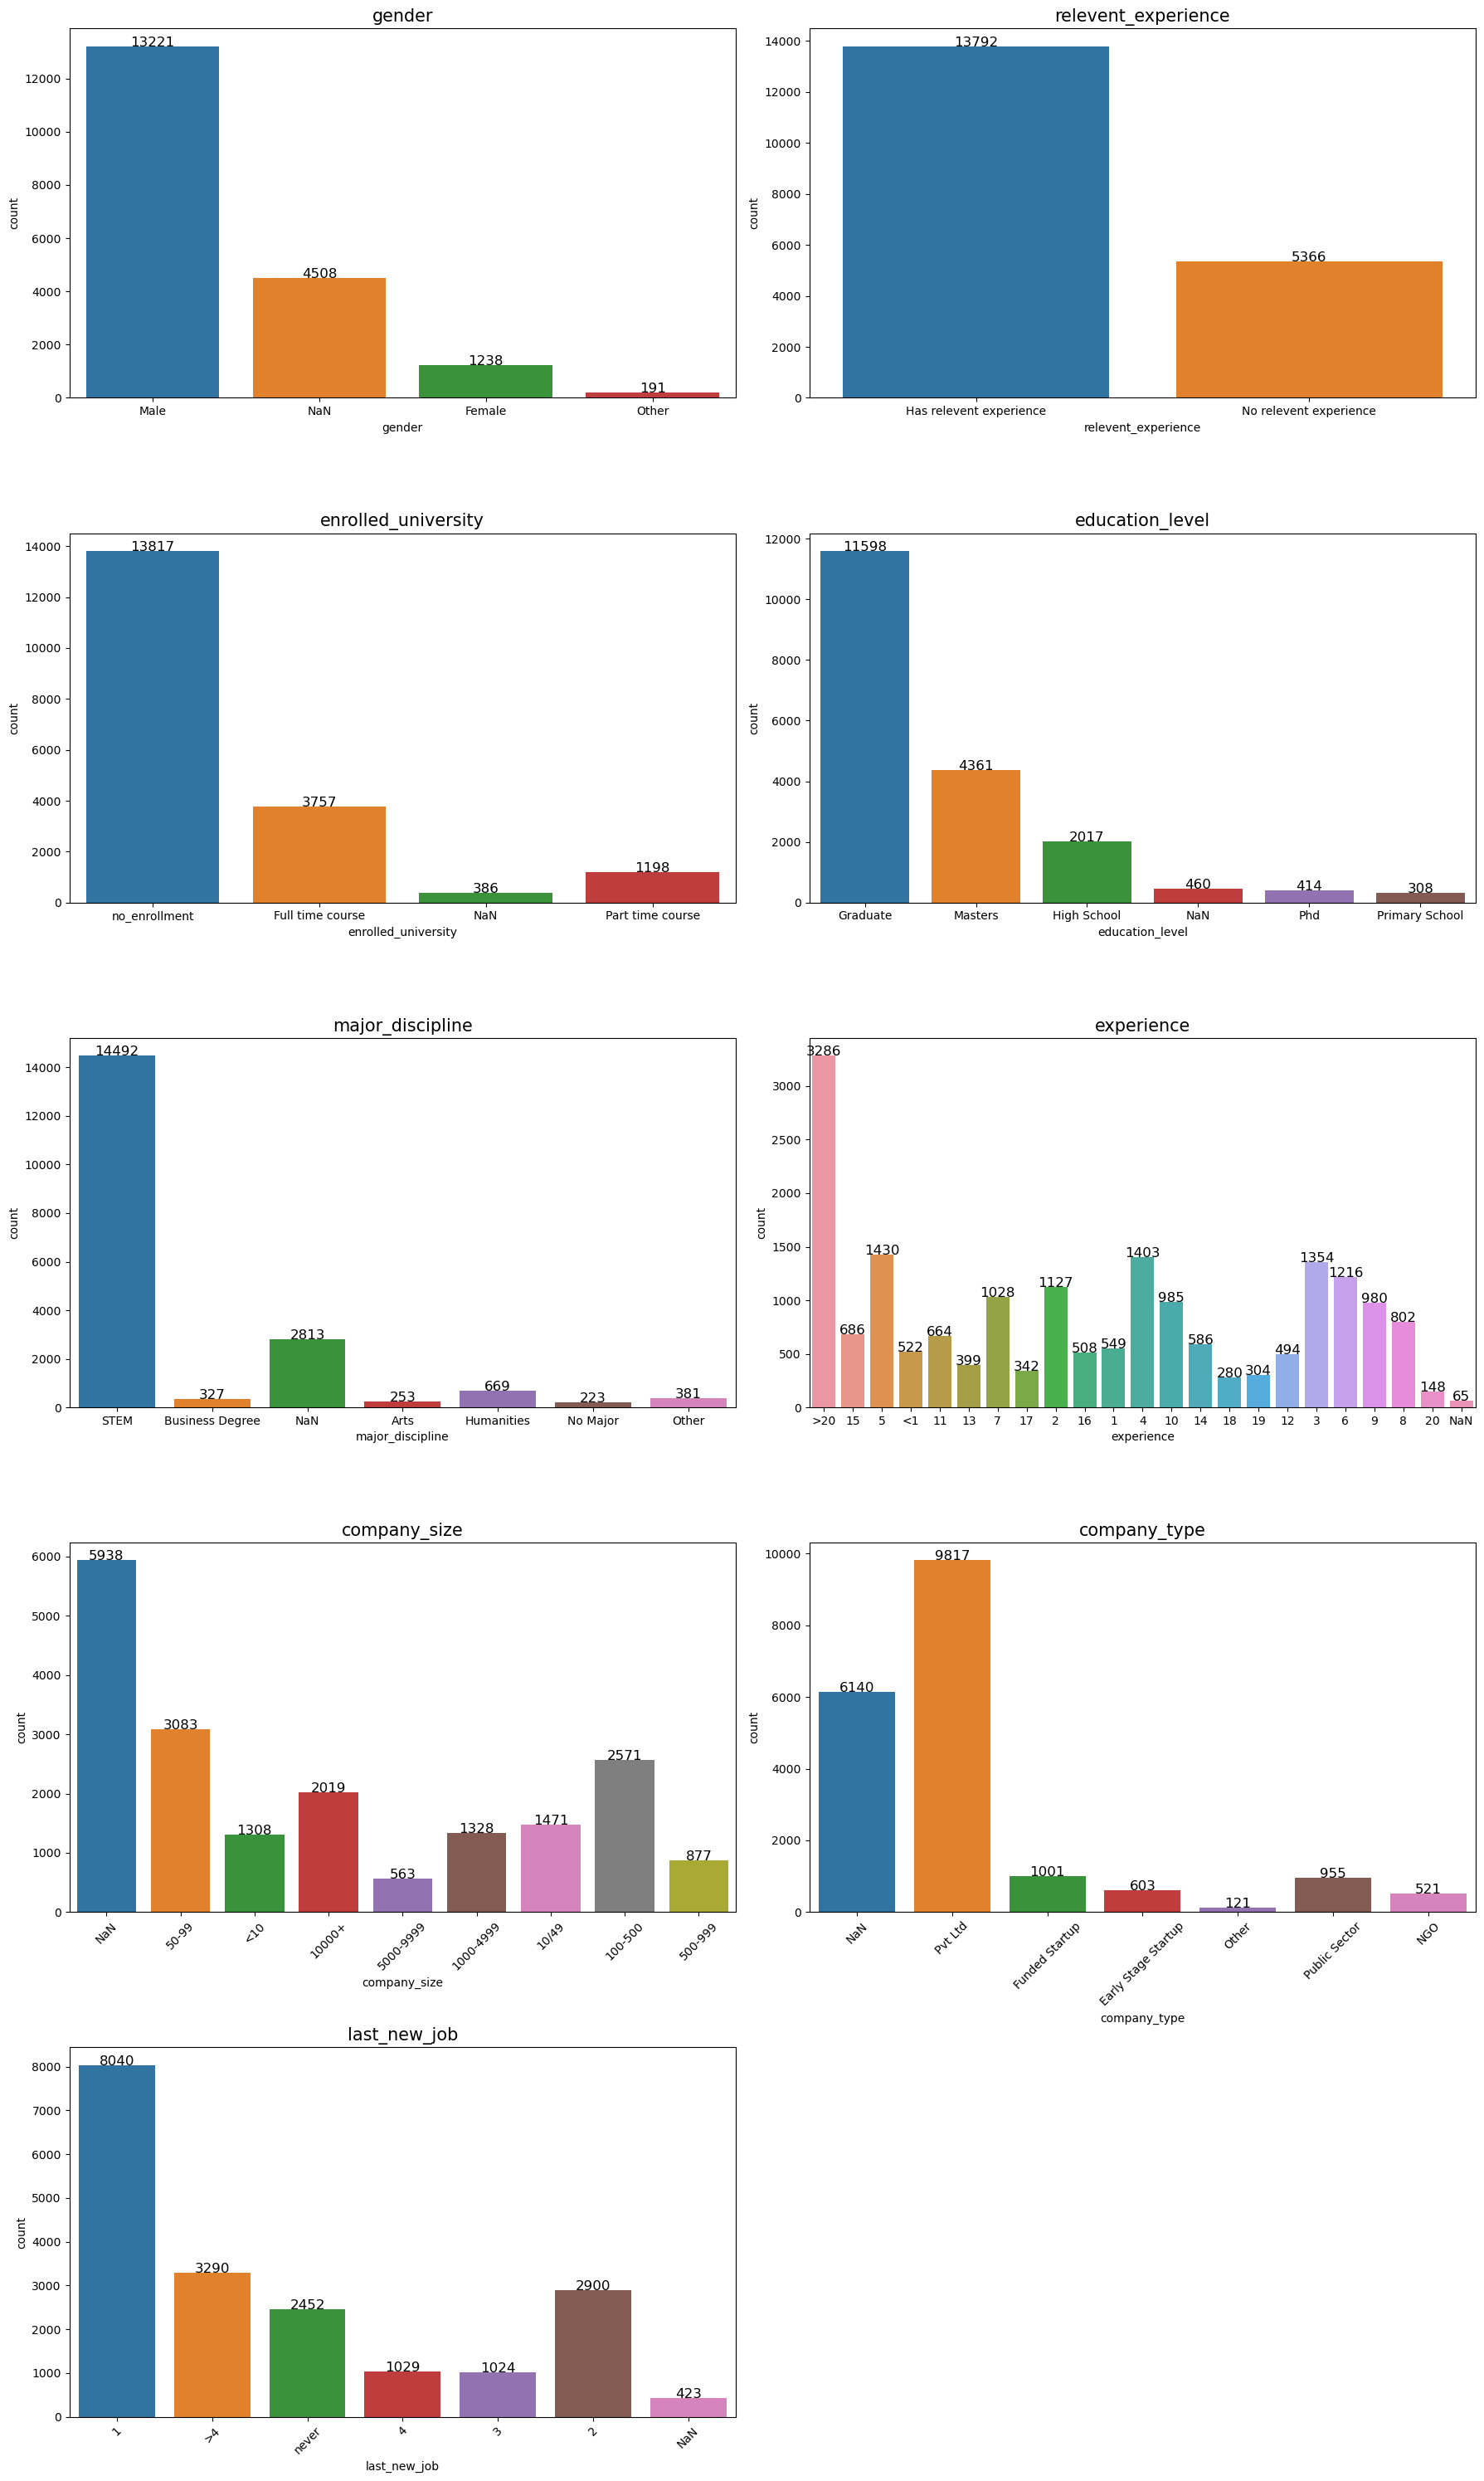

In [14]:
# Plot

# Tamanho da figura
plt.figure(figsize = (18,30))

#lista de colunas:
column_list = list(df.columns.values)[3:12]

#contador
A = 0

#loop
for i in column_list:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', 
                    (p.get_x() + 0.4, p.get_height()), 
                    ha = 'center',
                    color = 'black',
                    size = 12)
        if A >=7:
            plt.xticks(rotation = 45)
            
# Layout
plt.tight_layout(h_pad = 2)

In [15]:
#descrevendo os dados númericos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


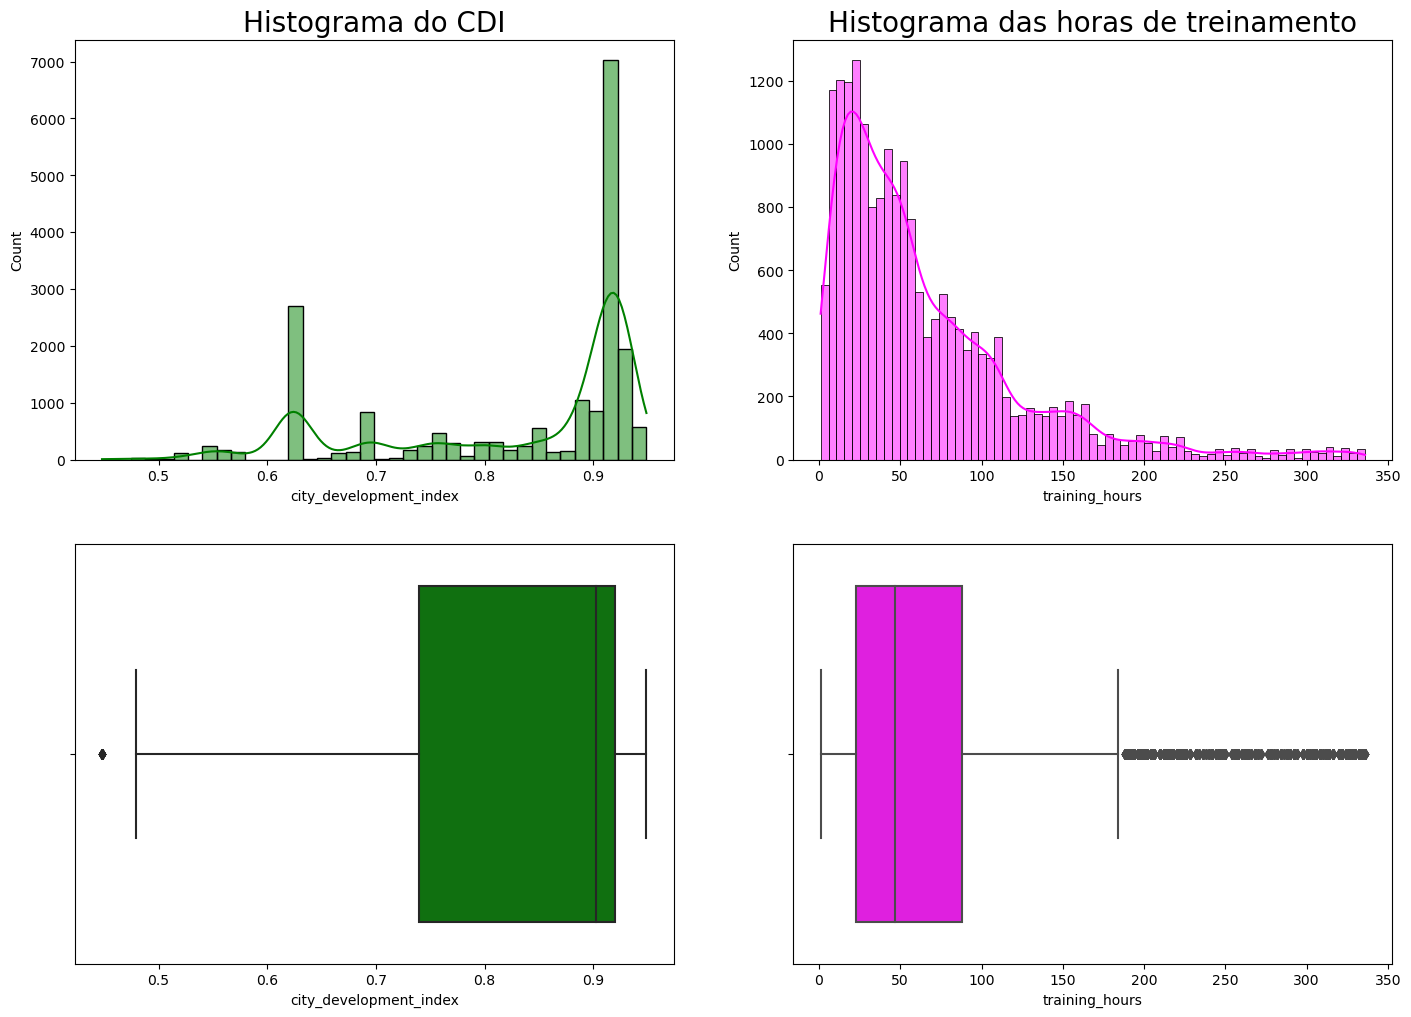

In [16]:
#Figura
plt.figure(figsize = (17,12))

# Subplots com histograma
plt.subplot(221)
sns.color_palette("hls",8)
sns.histplot(df['city_development_index'], kde = True, color = "green")
plt.title("Histograma do CDI", fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title("Histograma das horas de treinamento", fontsize = 20)

#Subplots com boxplots
plt.subplot(223)
sns.boxplot(df["city_development_index"], color = "green")

plt.subplot(224)
sns.boxplot(df["training_hours"], color = "magenta")

plt.show()

In [17]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index', 'training_hours']

for i in numerical_feature:
    stats, pval = normaltest(df[i]) #calcula a normalidade utilizado scipy
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


Correlação dos Dados

In [18]:
df_numerical = df.copy() #copiando o dataframe original

In [19]:
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [20]:
#convertendo a variavel experience para numérica
df_numerical["experience"] = np.where(df_numerical["experience"] == "<1", 1, 
                                      df_numerical["experience"])
df_numerical["experience"] = np.where(df_numerical["experience"] == ">20", 21, 
                                      df_numerical["experience"])
df_numerical["experience"] = df_numerical["experience"].astype(float)

In [21]:
df_numerical["experience"].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [22]:
#convertendo a variavel last_new_job para numérica
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == "never", 0, 
                                        df_numerical["last_new_job"])
df_numerical["last_new_job"] = np.where(df_numerical["last_new_job"] == ">4", 5, 
                                        df_numerical["last_new_job"])
df_numerical["last_new_job"] = df_numerical["last_new_job"].astype(float)

In [23]:
df_numerical["last_new_job"].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [24]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [25]:
df_numerical.drop("enrollee_id", axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


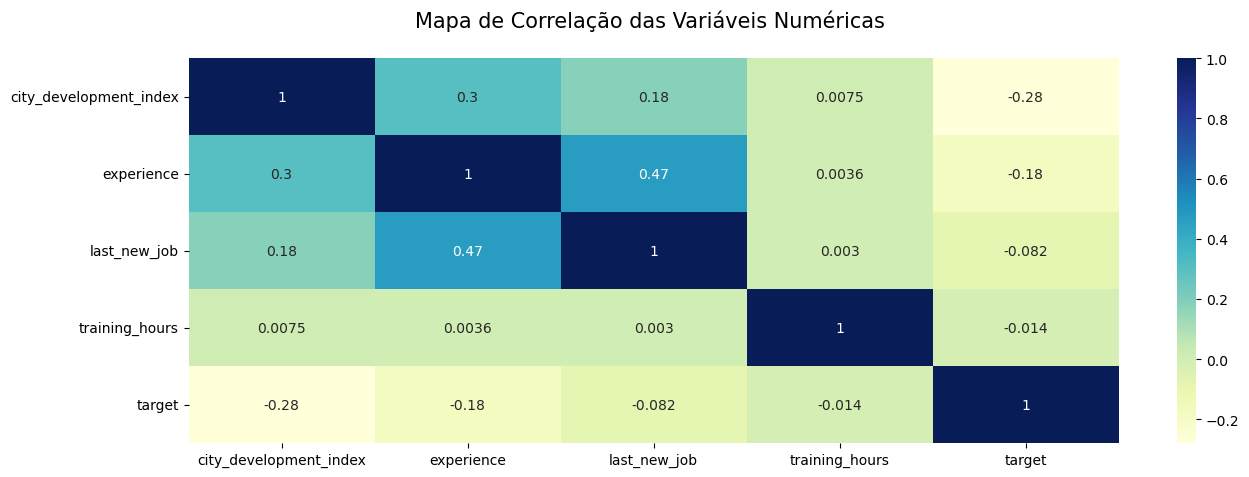

In [26]:
# Heatmap
plt.figure(figsize = (15, 5))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas \n", fontsize = 15)
plt.show()

Weight of Evidence (WOE) e Information Value (IV)

In [27]:
for i in df.drop(columns = ['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'last_new_job',
                           'company_size']).columns:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    
    print(df_woe_iv, '\n ---------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
 ---------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
 ---------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
 ---------------------------------------------------------
target                0.0       1.

In [28]:
df_woe_iv.tail(5)

target,0.0,1.0,woe,iv
company_type,,,,
Funded Startup,0.081035,0.058504,-0.325790,0.017772
NGO,0.039906,0.040535,0.015639,0.017772
Other,0.008659,0.012119,0.336169,0.017772
Public Sector,0.070118,0.087756,0.224385,0.017772
Pvt Ltd,0.756894,0.741747,-0.020215,0.017772


<Figure size 1500x500 with 0 Axes>

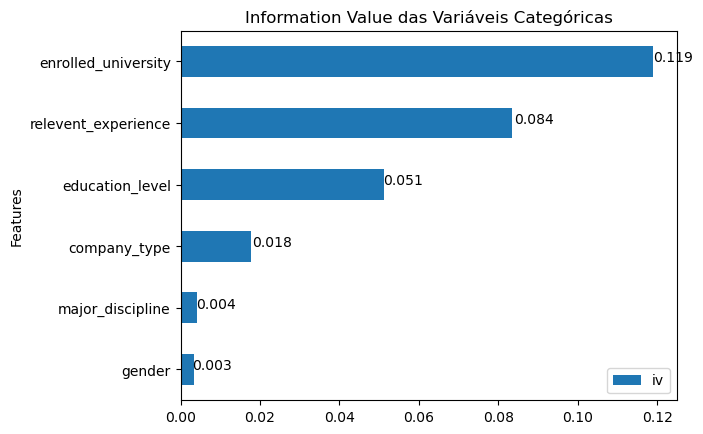

In [29]:
#Plot

columns_cat = df.drop(columns = ['target',
                           'enrollee_id',
                           'city',
                           'city_development_index',
                           'training_hours',
                           'experience',
                           'last_new_job',
                           'company_size']).columns

iv = []

for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
df_iv = pd.DataFrame({'Features': columns_cat, 'iv': iv}).set_index('Features').sort_values(by = 'iv')

plt.figure(figsize = (15, 5))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas')
for index, value in enumerate(list(round(df_iv['iv'],3))):
    plt.text((value), index, str(value))
plt.legend(loc = 'lower right')
plt.show()

Identificando Valores Ausentes

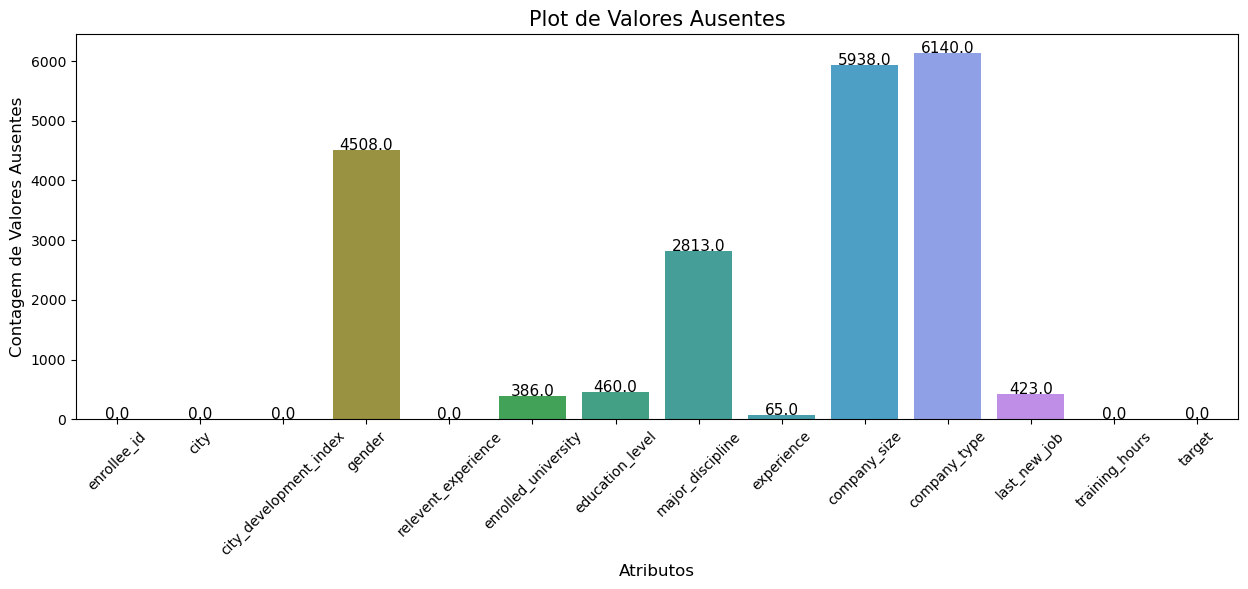

In [30]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

ax = plt.figure(figsize = (15, 5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Plot de Valores Ausentes', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + 0.4, (p.get_height())),
                ha = 'center',
                color = 'black',
               size = 11)
plt.show()

In [31]:
null_df.head(3)

,index,0
0,enrollee_id,0
1,city,0
2,city_development_index,0


In [32]:
teste = pd.DataFrame(df.isna().sum())

In [33]:
teste[teste[0] > 0]

,0
gender,4508
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938
company_type,6140
last_new_job,423


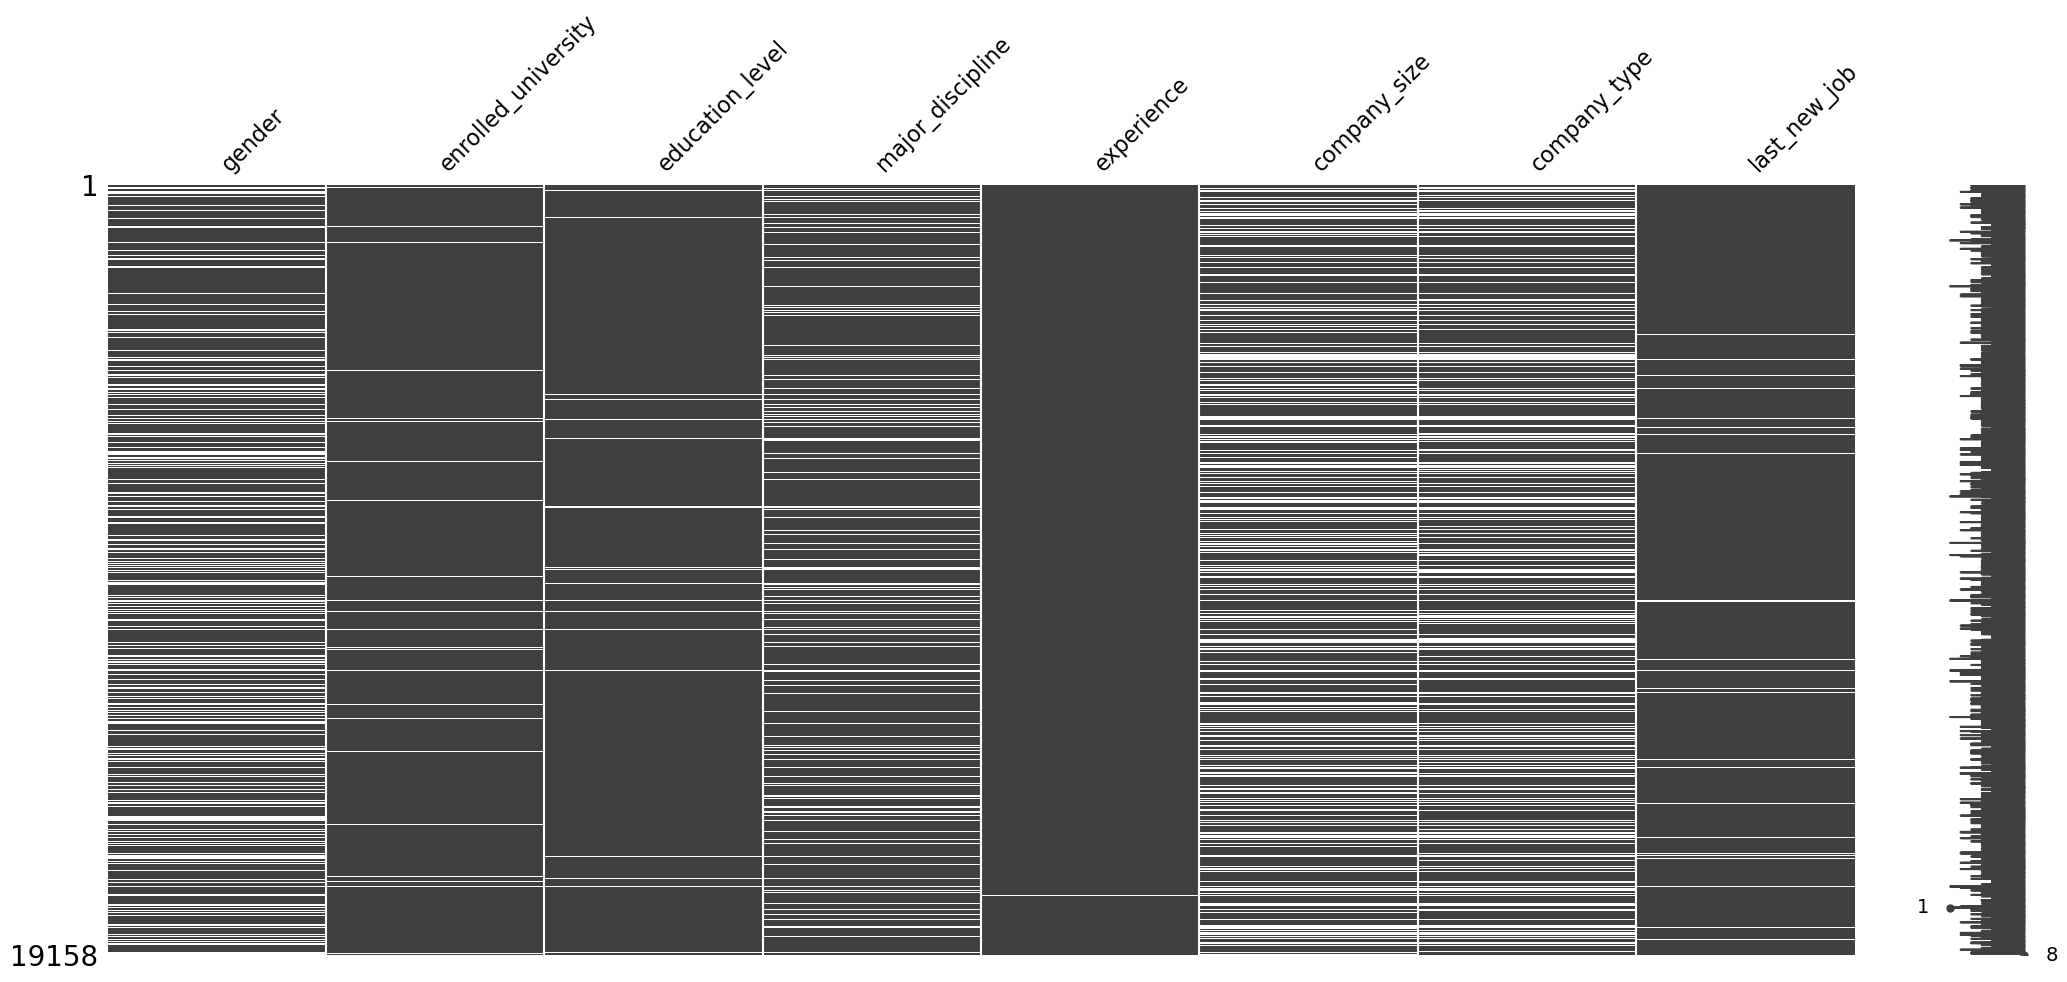

In [34]:
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis = None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

In [35]:
# Verificando registro duplicados
df['enrollee_id'].duplicated().sum()

0

Identificando Dados Desbalanceados

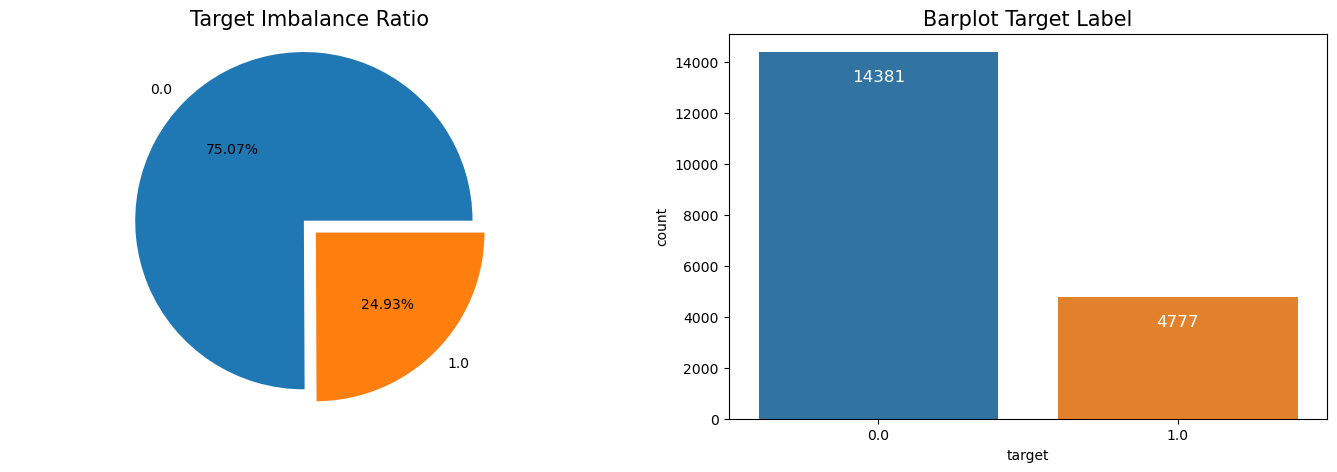

In [36]:
plt.figure(figsize = (17, (100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels = list(df['target'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0, 0.1))

plt.axis('equal')
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
               (p.get_x() + 0.4,
                p.get_height()),
               ha = 'center',
               va = 'top',
               color = 'white',
               size = 12)

Limpeza e Processamento dos Dados

In [37]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [38]:
colunas_manter = ['city_development_index',
                 'experience',
                 'enrolled_university',
                 'relevent_experience',
                 'education_level',
                 'company_type',
                 'major_discipline',
                 'target']

In [39]:
new_df = df[colunas_manter]

In [40]:
new_df.head(3)

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0


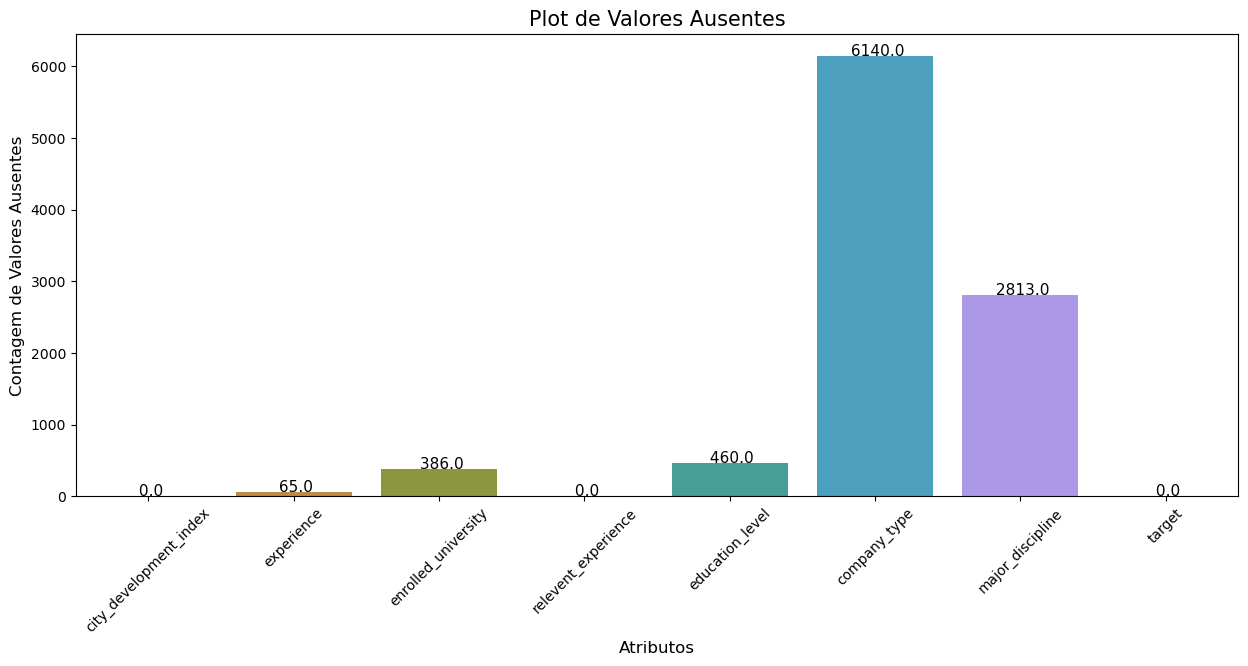

In [41]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

ax = plt.figure(figsize = (15, 6))

ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Plot de Valores Ausentes', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '11'
               )
plt.show()

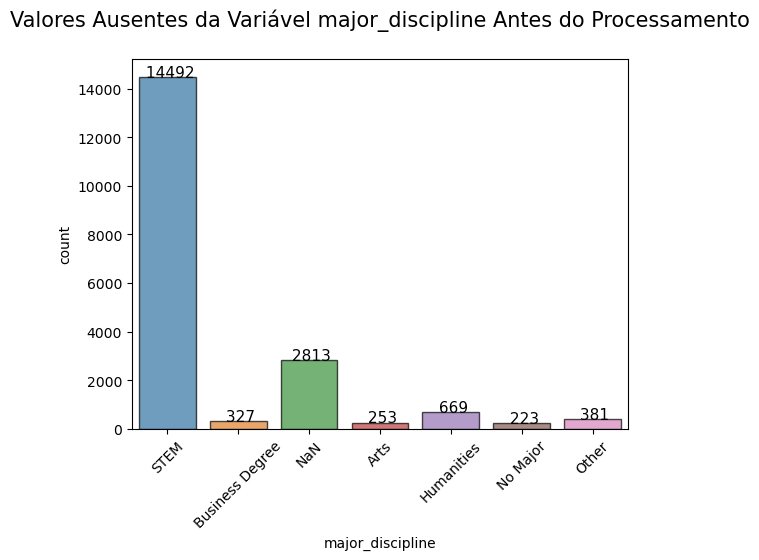

In [42]:
# Valores ausentes da variável major_discipline antes do processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '11'
               )
plt.title('Valores Ausentes da Variável major_discipline Antes do Processamento\n', fontsize = 15)
plt.show()    

In [43]:
# Relação entre major_discipline x education_level
print('Total de Valores Ausentes na Variável major_discipline', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level: ')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline 2813

Proporção de Valores Ausentes na Variável education_level: 


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

In [44]:
# criando os indices que serão substituidos
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level'] == 'High School')
                                                        |(new_df['education_level'].isna())
                                                        |(new_df['education_level'] == 'Primary School'))]).index

In [45]:
len(nan_index) 

2785

In [46]:
nan_index[0:10]

Int64Index([6, 10, 13, 14, 25, 28, 36, 39, 41, 54], dtype='int64')

In [47]:
# Inserção do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [48]:
new_df.head(4)

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0


In [49]:
print('Total de Valores Ausentes na Variável major_discipline', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores Ausentes na Variável major_discipline 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

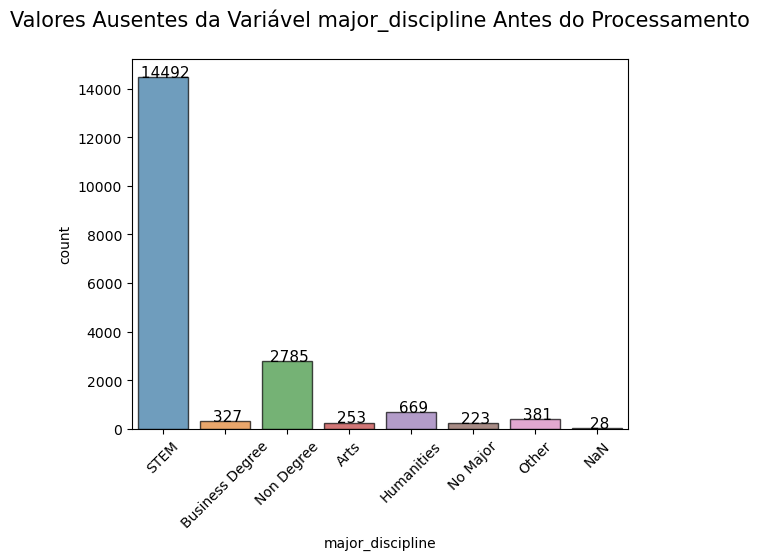

In [50]:
# Valores ausentes da variável major_discipline após o processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '11'
               )
plt.title('Valores Ausentes da Variável major_discipline Antes do Processamento\n', fontsize = 15)
plt.show()    

In [51]:
# Para os valores ausentes restantes preenchemos com 'Other'
new_df[new_df['major_discipline'].isna()] = 'Other'

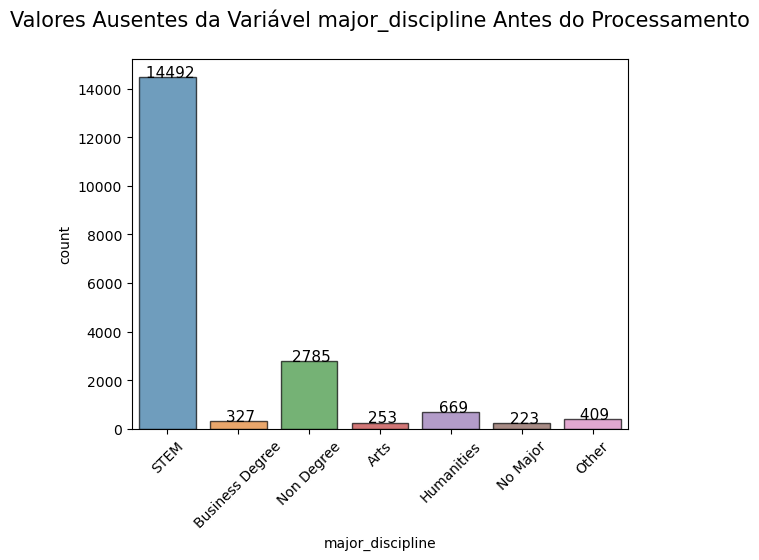

In [52]:
# Valores ausentes da variável major_discipline após o processamento
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '11'
               )
plt.title('Valores Ausentes da Variável major_discipline Antes do Processamento\n', fontsize = 15)
plt.show()   

Variável enrolled_university

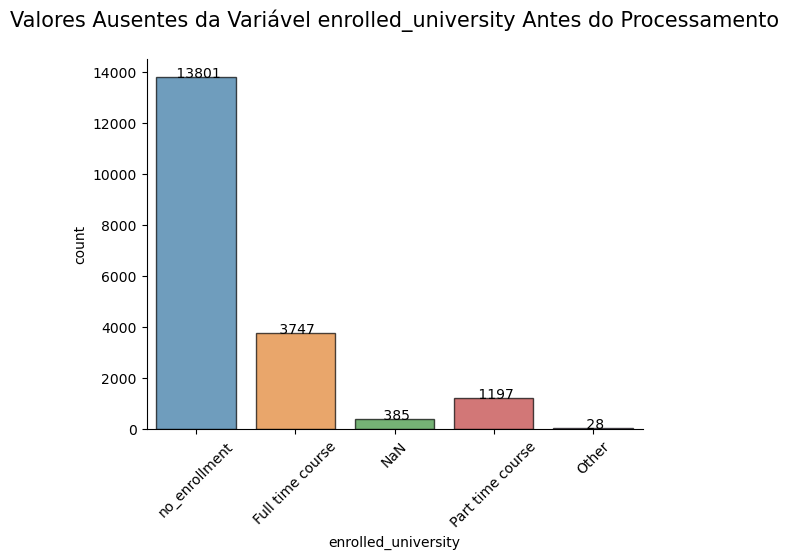

In [53]:
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )
plt.title('Valores Ausentes da Variável enrolled_university Antes do Processamento\n', fontsize = 15)
plt.show()

In [54]:
print('Total de Valores Ausentes na Variável enrolled_university', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level: ')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes na Variável enrolled_university 385

Proporção de Valores Ausentes na Variável education_level: 


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [55]:
# Prepara o indice
nan_index = (new_df[(new_df['enrolled_university'].isna()) 
                    & (new_df['education_level'] == 'Primary School')]).index

In [56]:
len(nan_index)

9

In [57]:
new_df['enrolled_university'][nan_index] = 'Primary Grad'

In [58]:
print('Total de Valores Ausentes na Variável enrolled_university', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes na Variável enrolled_university 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [59]:
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [60]:
new_df['enrolled_university'][nan_index] = 'Other'

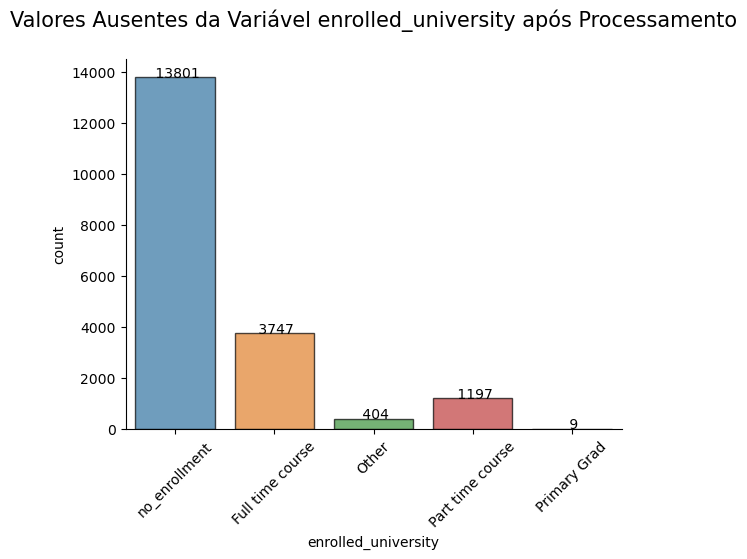

In [61]:
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )
plt.title('Valores Ausentes da Variável enrolled_university após Processamento\n', fontsize = 15)
plt.show()

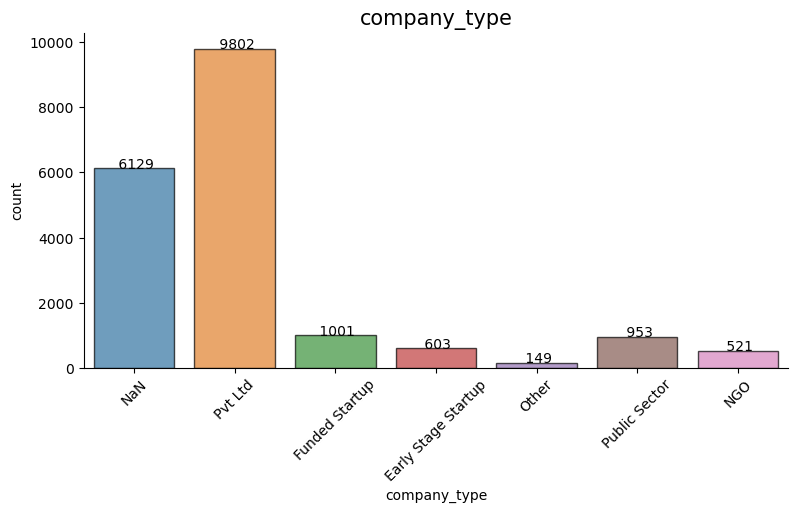

In [62]:
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A += 1
    plt.subplot(4, 2, A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i, fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )  
if A >=0:
    plt.xticks(rotation = 45)

In [63]:
new_df['company_type'].value_counts(dropna = False)

Pvt Ltd                9802
NaN                    6129
Funded Startup         1001
Public Sector           953
Early Stage Startup     603
NGO                     521
Other                   149
Name: company_type, dtype: int64

In [64]:
nan_index = new_df[(new_df['company_type'].isna())].index

In [65]:
new_df['company_type'][nan_index] = 'other'

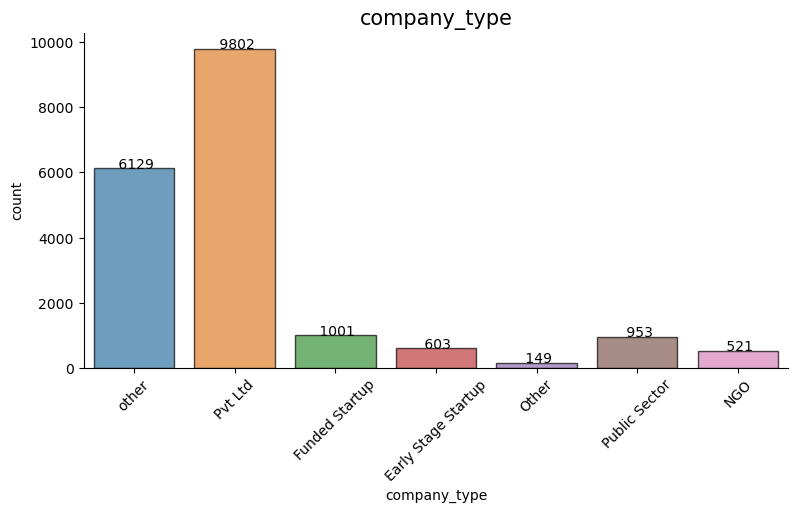

In [66]:
plt.figure(figsize = (20, 20))
column_list = ['company_type']
A = 0
for i in column_list:
    A += 1
    plt.subplot(4, 2, A)
    ax = sns.countplot(data = new_df.fillna('NaN'), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i, fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )  
if A >=0:
    plt.xticks(rotation = 45)

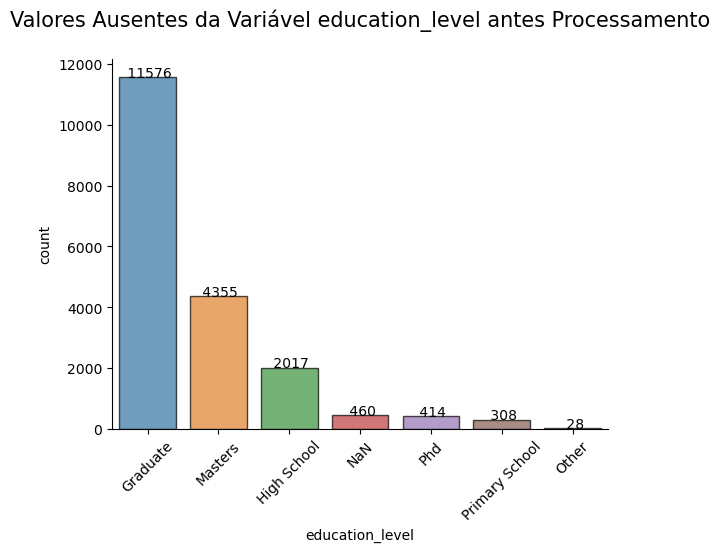

In [67]:
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )
plt.title('Valores Ausentes da Variável education_level antes Processamento\n', fontsize = 15)
plt.show()

In [68]:
nan_index = new_df[(new_df['education_level'].isna())].index

In [69]:
new_df['education_level'][nan_index] = 'other'

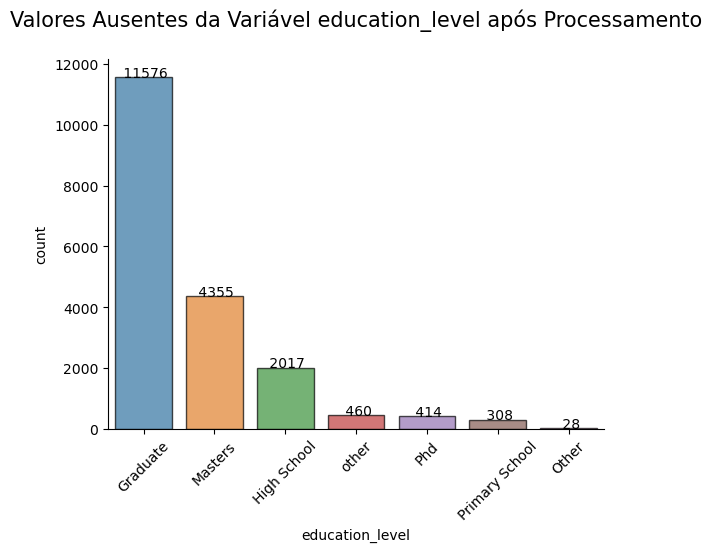

In [70]:
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n {p.get_height()}', 
                (p.get_x() + 0.4, 
                (p.get_height())), 
                ha= 'center',
                color = 'black',
                size = '10'
               )
plt.title('Valores Ausentes da Variável education_level após Processamento\n', fontsize = 15)
plt.show()

In [71]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [74]:
percentual_missing = new_df.isnull().sum() / len(new_df['experience']) * 100
percentual_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [75]:
percentual_missing = new_df['experience'].isnull().sum() / len(new_df['experience']) * 100
percentual_missing

0.3288443470090824

In [76]:
new_df.dropna(inplace = True)

In [77]:
new_df.shape

(19095, 8)

In [78]:
percentual_missing = new_df.isnull().sum() / len(new_df['experience']) * 100
percentual_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

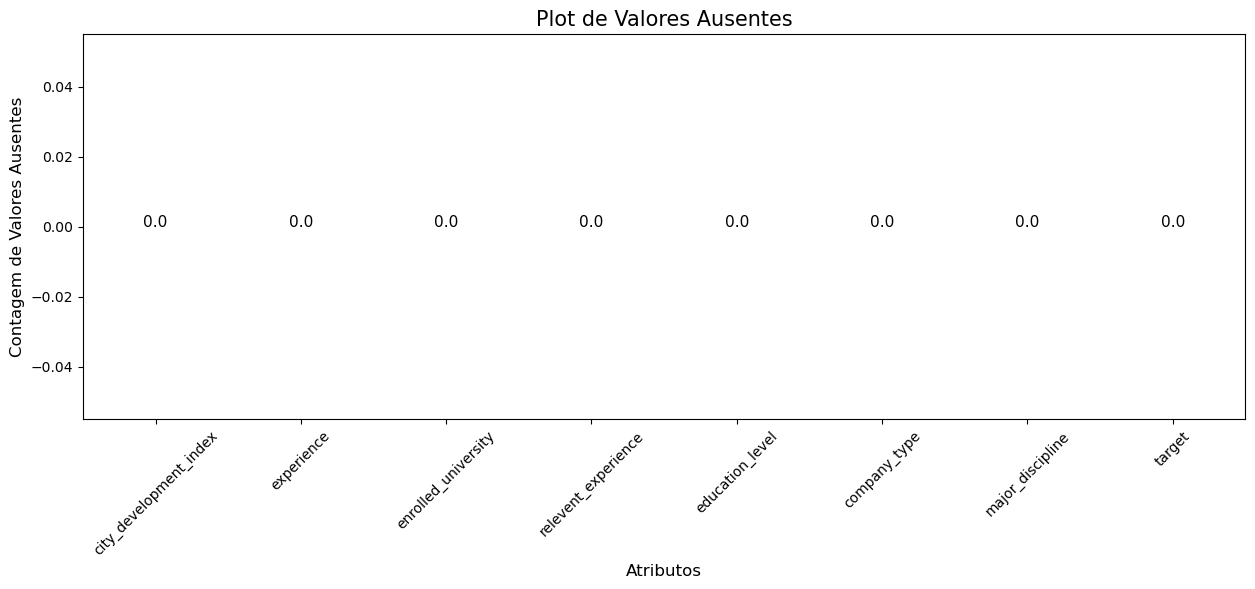

In [80]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

ax = plt.figure(figsize = (15, 5))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title('Plot de Valores Ausentes', fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x() + 0.4, (p.get_height())),
                ha = 'center',
                color = 'black',
               size = 11)
plt.show()

In [82]:
new_df.head(5)

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [87]:
# Ajustando dados
new_df['enrolled_university'] = new_df.apply(lambda x: x['enrolled_university'].capitalize(), axis = 1)

In [88]:
new_df

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No_enrollment,Has relevent experience,Graduate,other,STEM,1.0
1,0.776,15,No_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0
...,...,...,...,...,...,...,...,...
19153,0.878,14,No_enrollment,No relevent experience,Graduate,other,Humanities,1.0
19154,0.92,14,No_enrollment,Has relevent experience,Graduate,other,STEM,1.0
19155,0.92,>20,No_enrollment,Has relevent experience,Graduate,Pvt Ltd,STEM,0.0
19156,0.802,<1,No_enrollment,Has relevent experience,High School,Pvt Ltd,Non Degree,0.0


In [89]:
x = new_df.drop(columns = ['target'])
y = new_df['target']